Import Libraries

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

Read csv

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Check for duplicates and drop same if any

In [5]:
print(data.duplicated().sum())

1


In [6]:
data.loc[data.duplicated(keep=False), :]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
data=data.drop_duplicates().reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Create a new column to aggregate the bmi values

In [31]:
data['bmi_level'] = data['bmi'].apply(
    lambda x: 'High' if x > 28
    else ('medium' if 25<x<28 else 'low') 
)

In [32]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_level
0,19,female,27.900,0,yes,southwest,16884.92400,medium
1,18,male,33.770,1,no,southeast,1725.55230,High
2,28,male,33.000,3,no,southeast,4449.46200,High
3,33,male,22.705,0,no,northwest,21984.47061,low
4,32,male,28.880,0,no,northwest,3866.85520,High


In [33]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Frequency Distribution Plots

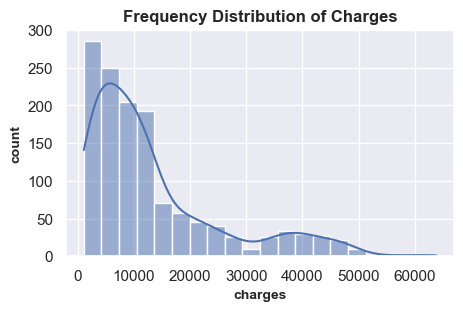

In [56]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data['charges'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('charges', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of Charges', 
            fontsize=12, fontweight='bold')
plt.show()

Some outliers on the upper end of the charges label

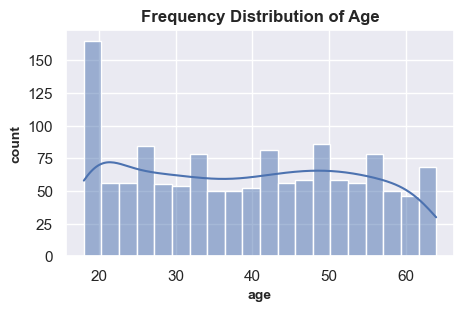

In [57]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data['age'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of Age', 
            fontsize=12, fontweight='bold')
plt.show()

There seem to be a fair distribution of the age feature in that there is no dominant age range in the dataset

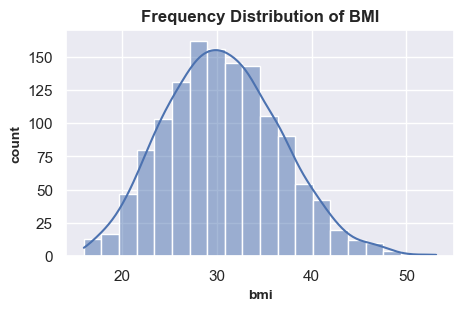

In [58]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data['bmi'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('bmi', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of BMI', 
            fontsize=12, fontweight='bold')
plt.show()

The bmi attribute, to a great extent, is normally distributed

Scatter Plots

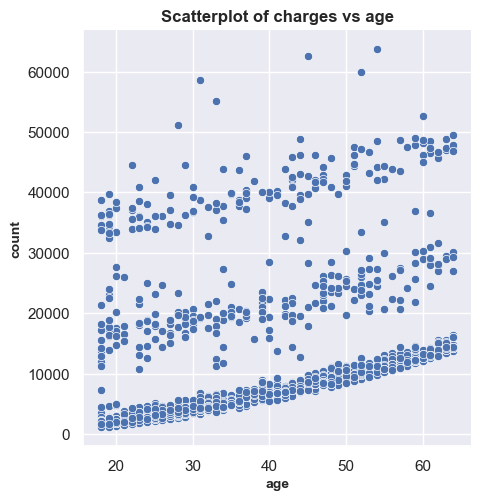

In [59]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age', 
            fontsize=12, fontweight='bold')
plt.show()

It is clear there is some relationship between age and charges, however it seems there are different categories from this plot. Let's investigate what could be responsible for the different categories.

First, let's test with the sex attribute.

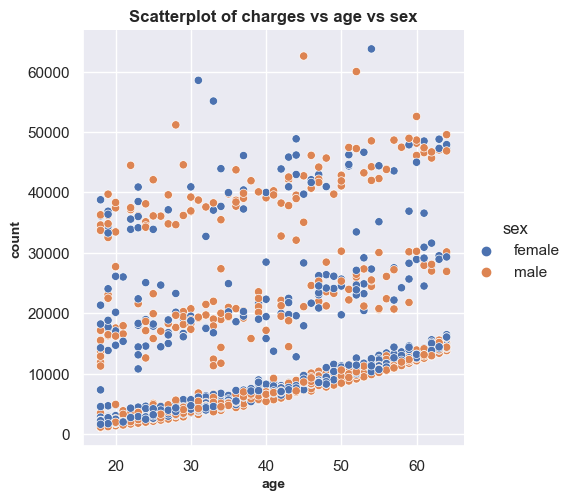

In [64]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='sex', 
            data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age vs sex', 
            fontsize=12, fontweight='bold')
plt.show()

There is a mixture of both sexes in the three catgories from the plot.

Next, we test with the smoker attribute.

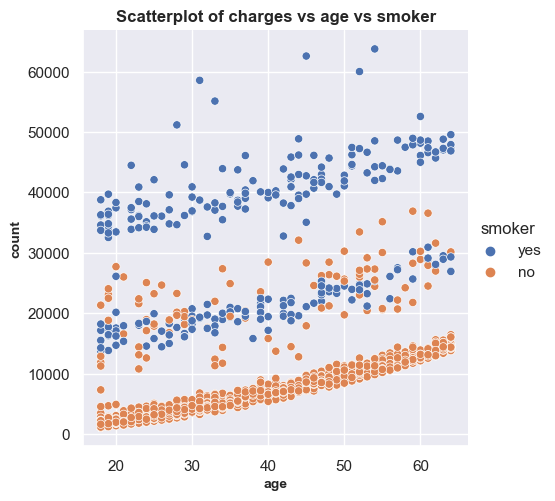

In [61]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='smoker', data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age vs smoker', 
            fontsize=12, fontweight='bold')
plt.show()

We can see some uniformity in the three categories from the plot. One catgory has mostly non smokers, the second has mostly smokers and the third has both smokers and non smokers.

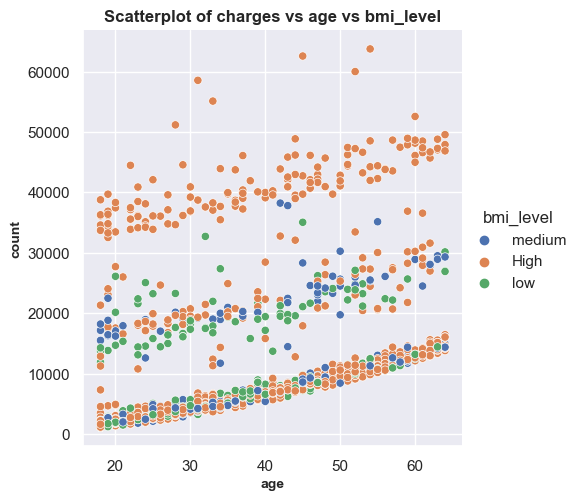

In [65]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='bmi_level', data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age vs bmi_level', 
            fontsize=12, fontweight='bold')
plt.show()

The bmi_level attribute gives us some information with respect to the bmi_level associated with the charges label. Almost all the charges above 30,000 is associated with high bmi_level. 

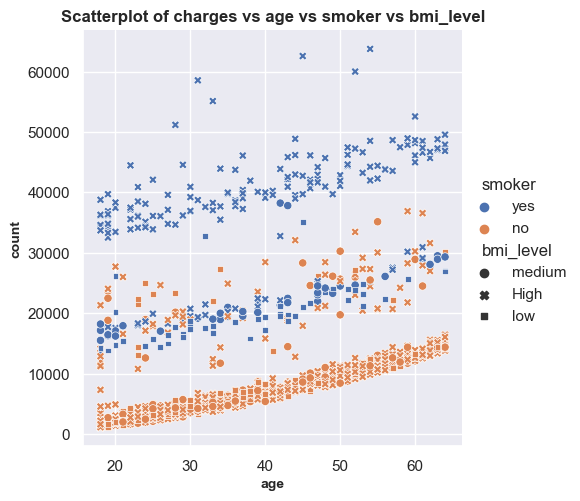

In [68]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='smoker', style='bmi_level', data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age vs smoker vs bmi_level', 
            fontsize=12, fontweight='bold')
plt.show()

Let's use the smoker attribute and the bmi_level attribute to find other interesting factos from the categories. From this plot we can see that almost all high charges are associated with high bmi_level and smoker. We can also establish that lower charges are associated with mostly non smoker and all classes of bmi_level and age attributes.

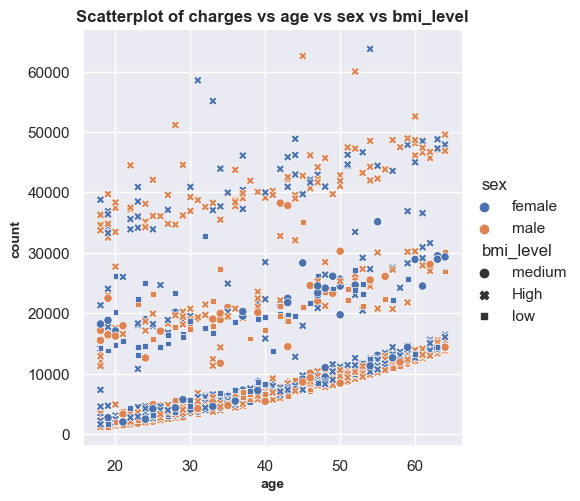

In [69]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='sex', style='bmi_level', data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age vs sex vs bmi_level', 
            fontsize=12, fontweight='bold')
plt.show()

We however cannot establish a similar relationship is we substitute the smoker attribute with the sex attribute. Though we can see that higher charges are associated with high bmi_level, the sex attribute cannot be used to distinguish the categories in any way.

Outliers

From the frequency distribution of the charges attirbute, we observed there are low occuring high charges in the frequency plot. We can analyze these outliers to establish what are the contributory factors to these high charges.

First, we need to establish a cut off for the outliers. For the sake of this analysis, our cut off will be the 80th quantile of the charges attribute.

In [39]:
data.charges.quantile(0.8)

20269.216957999997

We can extract a dataframe based on the charges above the 80th quantile and 

In [40]:
data_80th_q = data[data['charges']>data.charges.quantile(0.8)]
data_80th_q.reset_index()
data_80th_q.describe()

,age,bmi,children,charges
count,268.000000,268.000000,268.000000,268.000000
mean,42.667910,32.221194,1.145522,34243.269119
std,13.868219,5.726242,1.127333,9531.302451
min,18.000000,17.765000,0.000000,20277.807510
25%,31.000000,27.822500,0.000000,25040.131092
50%,45.000000,32.062500,1.000000,34833.763500
75%,54.000000,36.122500,2.000000,41238.271812
max,64.000000,52.580000,4.000000,63770.428010


The charges on this dataset for obvious reasons are the highest from the main dataset. However, the other numerical attributes do not follow the same pattern. Do these attributes follow the same pattern as we saw with the main dataset? Let's check that out. 

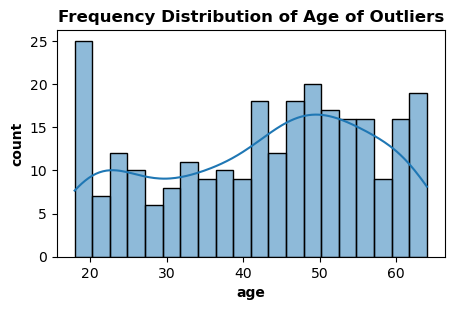

In [41]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data_80th_q['age'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of Age of Outliers', 
            fontsize=12, fontweight='bold')
plt.show()

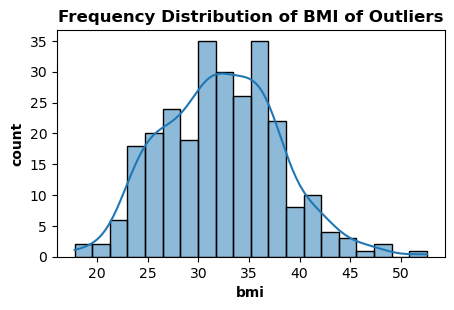

In [42]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data_80th_q['bmi'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('bmi', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of BMI of Outliers', 
            fontsize=12, fontweight='bold')
plt.show()

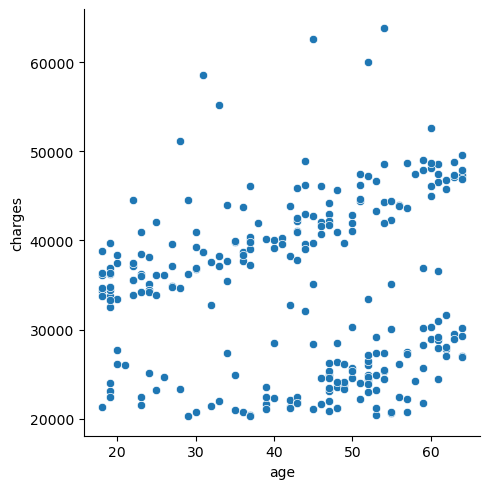

In [47]:
sns.relplot(x='age', y='charges', data=data_80th_q)

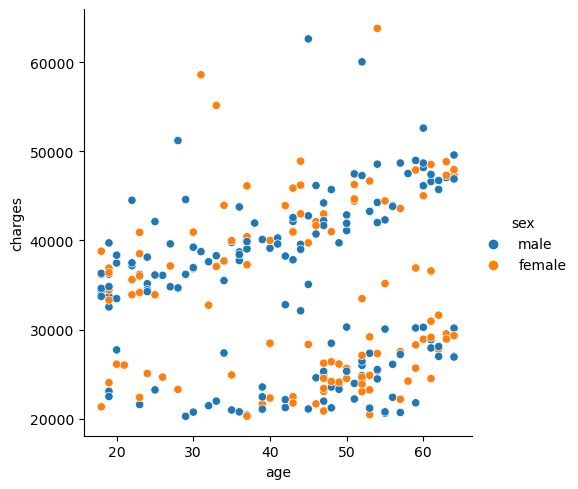

In [44]:
sns.relplot(x='age', y='charges', hue='sex', data=data_80th_q)

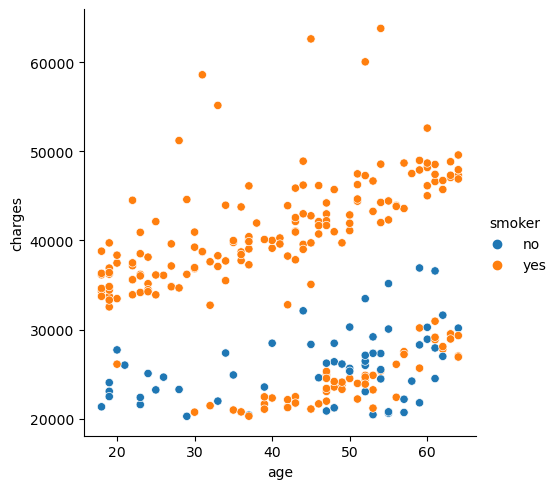

In [45]:
sns.relplot(x='age', y='charges', hue='smoker', 
            data=data_80th_q)

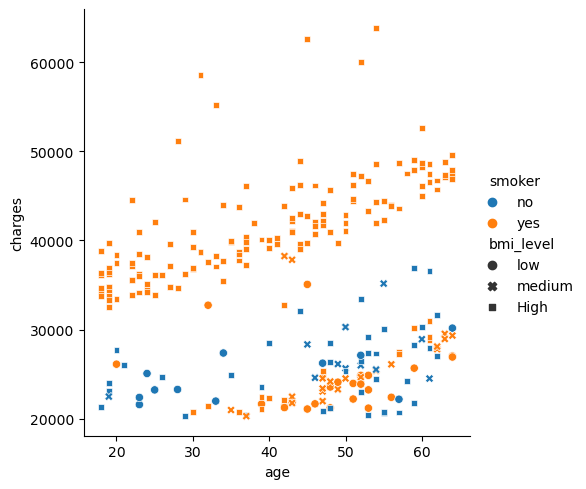

In [46]:
sns.relplot(x='age', y='charges', hue='smoker', 
            style = 'bmi_level', data=data_80th_q)

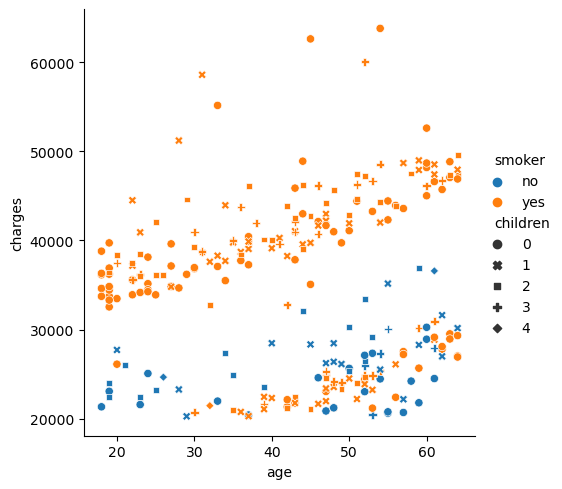

In [22]:
sns.relplot(x='age', y='charges', hue='smoker', 
            style = 'children', data=data_80th_q)

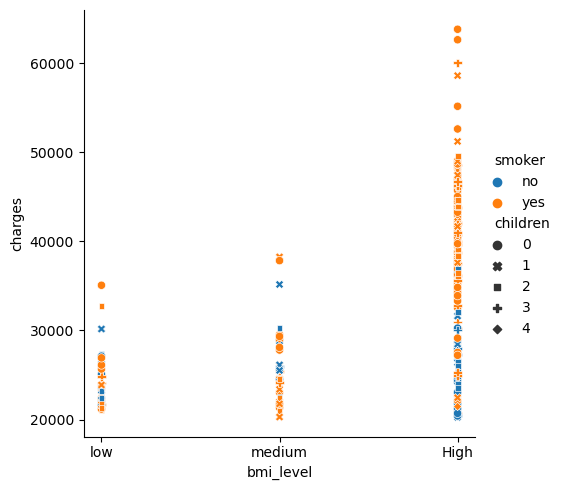

In [50]:
sns.relplot(x='bmi_level', y='charges', hue='smoker', 
            style='children', data=data_80th_q)

In [52]:
data.groupby(['sex', 'smoker', 'children'])['charges'].mean()

sex     smoker  children
female  no      0            7688.318863
                1            8758.560884
                2            9921.777645
                3           10128.716357
                4           13937.674562
                5            8544.113050
        yes     0           30685.059887
                1           30264.253915
                2           31663.833195
                3           30681.604257
                5           19023.260000
male    no      0            7557.343810
                1            7837.147396
                2            9020.567024
                3            9025.530139
                4           10305.014255
                5            7931.658310
        yes     0           31902.398075
                1           32904.876848
                2           35297.837461
                3           33869.169434
                4           26532.276933
Name: charges, dtype: float64